In [71]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Optional, Tuple


from sklearn.linear_model import LinearRegression as SklearnLR
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [72]:
TRAIN_CSV = 'train.csv'
TEST_CSV = 'test.csv'


if not os.path.exists(TRAIN_CSV):
    print(f"Warning: {TRAIN_CSV} not found in current folder.")
if not os.path.exists(TEST_CSV):
    print(f"Warning: {TEST_CSV} not found in current folder.")


train = pd.read_csv(TRAIN_CSV) if os.path.exists(TRAIN_CSV) else None
test = pd.read_csv(TEST_CSV) if os.path.exists(TEST_CSV) else None

Train shape: (11017, 35)


,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,4.0,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,2.0,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,3.0,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,3.0,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,5.0,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,31.347091


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

None

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
count,10487.000000,10487.000000,9986.000000,9986.000000,10487.000000,10487.000000,9986.000000,10487.000000,10487.000000,10487.000000,...,10487.000000,10487.000000,10487.000000,10487.000000,9.986000e+03,9986.000000,10487.000000,10487.000000,10487.000000,1.048700e+04
mean,39.850386,131587.872127,678.082716,29874.218306,53.439878,1.568323,546.458642,0.284397,3.033565,0.979498,...,10838.934141,0.784428,4.949271,17.628302,1.542381e+05,0.200392,0.200112,1075.622426,0.517577,-2.569878e+04
std,11.614132,115791.941909,175.192486,27705.509722,24.493562,1.418684,501.981888,0.159240,1.740186,0.990927,...,9385.924858,0.123039,2.201100,11.337248,4.622229e+05,0.094388,0.096458,1344.053181,0.894637,1.431675e+06
min,18.000000,15000.000000,300.000000,1063.000000,12.000000,0.000000,13.000000,0.003674,0.000000,0.000000,...,1250.000000,0.259301,0.000000,0.000000,1.004000e+03,0.052494,0.046445,30.008506,0.006064,-9.999999e+06
25%,32.000000,20959.500000,550.000000,12658.000000,36.000000,0.000000,233.250000,0.158929,2.000000,0.000000,...,1683.541667,0.708475,3.000000,9.000000,7.252500e+03,0.119908,0.119548,375.872620,0.066734,3.256475e+01
50%,40.000000,89015.000000,722.500000,21828.500000,48.000000,1.000000,398.000000,0.262229,3.000000,1.000000,...,7371.250000,0.803692,5.000000,17.000000,2.742950e+04,0.182023,0.180710,684.878529,0.178193,4.411876e+01
75%,48.000000,257025.000000,850.000000,37158.000000,60.000000,3.000000,685.000000,0.391683,4.000000,2.000000,...,21232.583333,0.879312,6.000000,26.000000,1.241758e+05,0.264709,0.264880,1279.930203,0.637457,6.535690e+01
max,80.000000,748508.000000,850.000000,418997.000000,120.000000,6.000000,10879.000000,0.914635,12.000000,6.000000,...,25000.000000,0.996573,17.000000,57.000000,1.126117e+07,0.722497,0.833647,29634.807816,24.383046,1.000000e+07



Missing values per column:
MonthlyDebtPayments          1031
LoanAmount                   1031
CreditScore                  1031
BaseInterestRate             1031
NetWorth                     1031
TotalAssets                  1031
BankruptcyHistory            1031
LoanPurpose                  1031
CheckingAccountBalance       1031
ApplicationDate               530
Age                           530
AnnualIncome                  530
HomeOwnershipStatus           530
NumberOfCreditInquiries       530
NumberOfOpenCreditLines       530
CreditCardUtilizationRate     530
NumberOfDependents            530
MaritalStatus                 530
LoanDuration                  530
LengthOfCreditHistory         530
dtype: int64


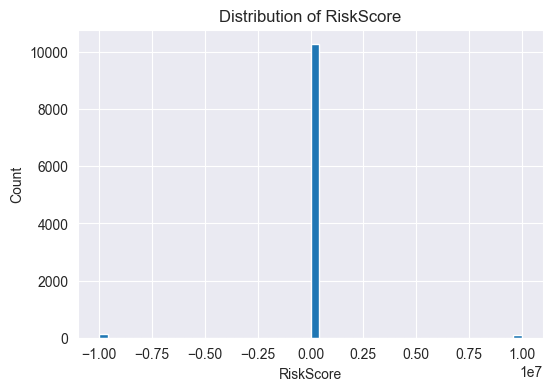

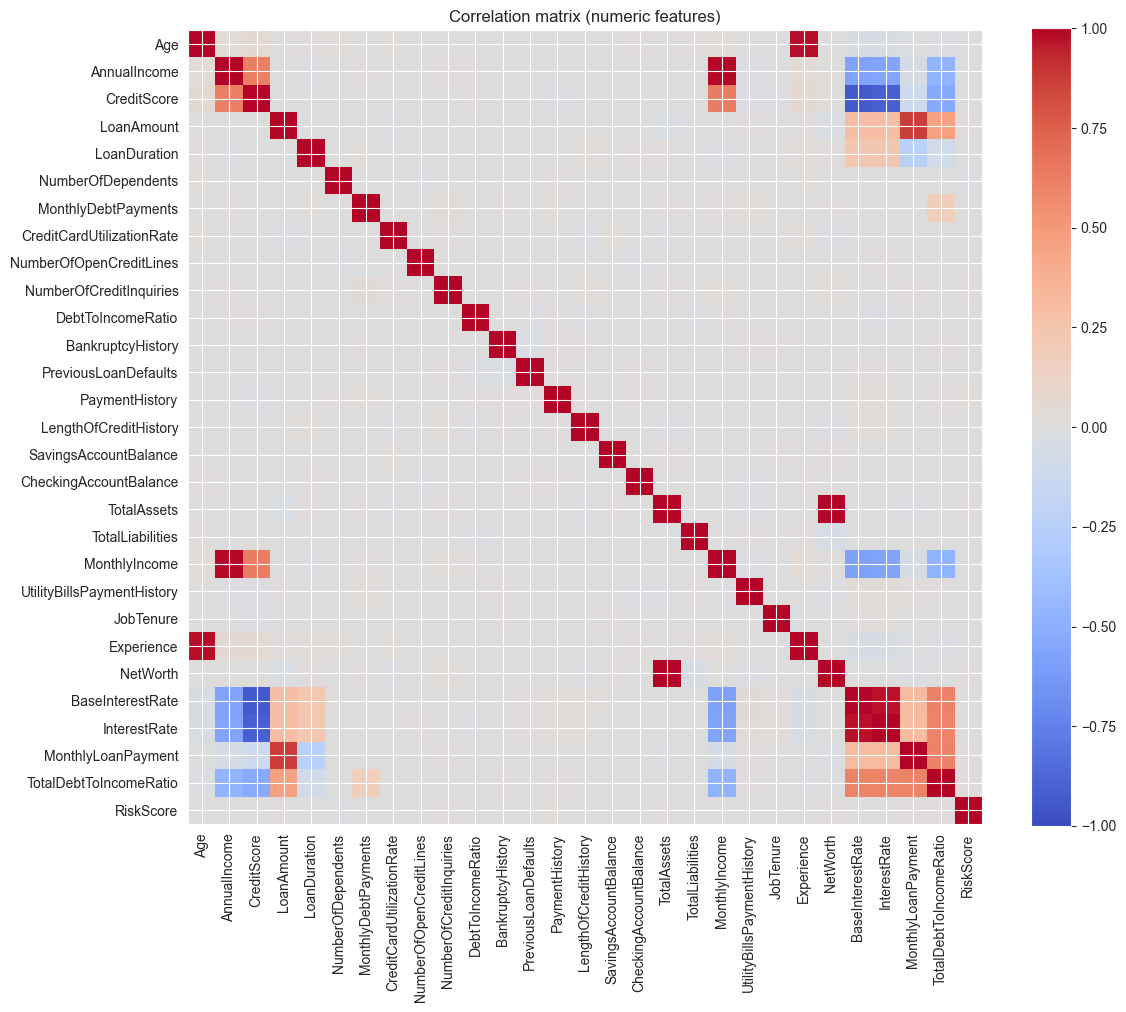

In [73]:
if train is not None:
    print('Train shape:', train.shape)
    display(train.head())
    display(train.info())
    display(train.describe())

    # Проверка пропусков
    print('\nMissing values per column:')
    print(train.isnull().sum().sort_values(ascending=False).head(20))

    # Гистограмма целевой переменной
    if 'RiskScore' in train.columns:
        plt.figure(figsize=(6,4))
        plt.hist(train['RiskScore'].dropna(), bins=50)
        plt.title('Distribution of RiskScore')
        plt.xlabel('RiskScore')
        plt.ylabel('Count')
        plt.show()

    # Матрица корреляций
    num = train.select_dtypes(include=[np.number])
    corr = num.corr()
    plt.figure(figsize=(12,10))
    plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title('Correlation matrix (numeric features)')
    plt.tight_layout()
    plt.show()

In [74]:
from sklearn.impute import SimpleImputer


def preprocess(df: pd.DataFrame, fit_imputers: Optional[dict]=None, categorical_threshold: int=20):
    """Простейшая предобработка: imputing, one-hot для категорий с небольшим числом уникальных значений.
    Возвращает (X, transformers_dict).
    Если передан fit_imputers, использует их (для test).
    """
    df = df.copy()
    # Сохраним ID, если есть
    ids = df['ID'] if 'ID' in df.columns else None


    # Разделим признаки по типу
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if 'RiskScore' in num_cols:
        num_cols.remove('RiskScore')
    if 'ID' in num_cols and ids is not None:
        num_cols.remove('ID')
    cat_cols = [c for c in df.columns if c not in num_cols and c not in ('RiskScore','ID')]


    # Для категорий оставим только те с небольшим количеством уникальных значений и закодируем one-hot
    small_cat = [c for c in cat_cols if df[c].nunique()<=categorical_threshold]
    large_cat = [c for c in cat_cols if df[c].nunique()>categorical_threshold]


    transformers = {} if fit_imputers is None else fit_imputers.copy()


    # Impute numeric
    if 'num_imputer' not in transformers:
        transformers['num_imputer'] = SimpleImputer(strategy='mean')
        transformers['num_imputer'].fit(df[num_cols])
    df_num = pd.DataFrame(transformers['num_imputer'].transform(df[num_cols]), columns=num_cols, index=df.index)


    # Impute small categorical with most_frequent
    if 'cat_imputer' not in transformers:
        transformers['cat_imputer'] = SimpleImputer(strategy='most_frequent')
        if small_cat:
            transformers['cat_imputer'].fit(df[small_cat])
    if small_cat:
        df_cat = pd.DataFrame(transformers['cat_imputer'].transform(df[small_cat]), columns=small_cat, index=df.index)
    else:
        df_cat = pd.DataFrame(index=df.index)


    # One-hot encode small categorical
    if 'onehot_cols' not in transformers:
        transformers['onehot_cols'] = []
        for c in small_cat:
            transformers['onehot_cols'].append((c, sorted(df[c].dropna().unique())))
    # Apply onehot
    ohe_frames = []
    for c, cats in transformers['onehot_cols']:
        # ensure same columns order
        col_vals = df_cat[c].astype(pd.CategoricalDtype(categories=cats)) if c in df_cat.columns else pd.Series([None]*len(df), index=df.index)
        ohe = pd.get_dummies(col_vals, prefix=c)
        # add missing columns if any
        for cat in cats:
            colname = f"{c}_{cat}"
            if colname not in ohe.columns:
                ohe[colname] = 0
        ohe = ohe[[f"{c}_{cat}" for cat in cats]]
        ohe_frames.append(ohe)


    if ohe_frames:
        df_ohe = pd.concat(ohe_frames, axis=1)
    else:
        df_ohe = pd.DataFrame(index=df.index)


    # Drop large categorical or keep encoded as freq? For simplicity, drop large_cat
    # Соберём финальный датафрейм
    X = pd.concat([df_num, df_ohe], axis=1)
    if ids is not None:
        X.insert(0,'ID', ids.values)


    y = df['RiskScore'] if 'RiskScore' in df.columns else None
    return X, y, transformers

In [75]:
class Normalizer:
    def __init__(self, method='zscore'):
        self.method = method
        self.params = {}

    def fit(self, X: pd.DataFrame):
        numeric_cols = X.select_dtypes(include=[np.number]).columns
        self.numeric_cols_ = numeric_cols

        if self.method == 'zscore':
            self.params['mean'] = X[numeric_cols].mean()
            self.params['std'] = X[numeric_cols].std().replace(0, 1)  # избегаем деления на 0
        elif self.method == 'minmax':
            self.params['min'] = X[numeric_cols].min()
            self.params['max'] = X[numeric_cols].max()
            # Избегаем деления на 0
            self.params['range'] = (self.params['max'] - self.params['min']).replace(0, 1)
        elif self.method == 'robust':
            self.params['median'] = X[numeric_cols].median()
            self.params['q1'] = X[numeric_cols].quantile(0.25)
            self.params['q3'] = X[numeric_cols].quantile(0.75)
            self.params['iqr'] = (self.params['q3'] - self.params['q1']).replace(0, 1)
        return self

    def transform(self, X: pd.DataFrame):
        X_transformed = X.copy()
        numeric_cols = self.numeric_cols_

        if self.method == 'zscore':
            X_transformed[numeric_cols] = (X[numeric_cols] - self.params['mean']) / self.params['std']
        elif self.method == 'minmax':
            X_transformed[numeric_cols] = (X[numeric_cols] - self.params['min']) / self.params['range']
        elif self.method == 'robust':
            X_transformed[numeric_cols] = (X[numeric_cols] - self.params['median']) / self.params['iqr']

        return X_transformed

    def fit_transform(self, X: pd.DataFrame):
        self.fit(X)
        return self.transform(X)

In [76]:
class LinearRegressionCustom:
    def __init__(self, fit_intercept=True, regularization: Optional[str]=None, alpha: float=0.0, l1_ratio: float=0.0):
        """regularization: None, 'l2', 'l1', 'elasticnet'
        alpha: regularization strength (lambda)
        l1_ratio: for elasticnet (between 0 and 1)
        """
        self.fit_intercept = fit_intercept
        self.regularization = regularization
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.coef_ = None
        self.intercept_ = 0.0

    def _add_intercept(self, X: np.ndarray) -> np.ndarray:
        if not self.fit_intercept:
            return X
        ones = np.ones((X.shape[0],1))
        return np.hstack([ones, X])


    def fit_normal_eq(self, X: np.ndarray, y: np.ndarray):
        Xb = self._add_intercept(X)

        n_features = Xb.shape[1]

        # Ridge closed form:
        # theta = (XᵀX + αI)^(-1) Xᵀ y
        A = Xb.T @ Xb

        if self.regularization == 'l2' and self.alpha > 0:
            L = np.eye(n_features) * self.alpha
            if self.fit_intercept:
                L[0, 0] = 0   # do NOT regularize intercept
            A = A + L

        # Solve stable system
        b = Xb.T @ y
        theta = np.linalg.lstsq(A, b, rcond=None)[0]
        if self.fit_intercept:
            self.intercept_ = float(theta[0])
            self.coef_ = theta[1:]
        else:
            self.intercept_ = 0.0
            self.coef_ = theta

        return self



    def predict(self, X: np.ndarray) -> np.ndarray:
        if self.coef_ is None:
            raise ValueError('Model is not fitted')
        Xb = X
        if self.fit_intercept:
            return X.dot(self.coef_) + self.intercept_
        else:
            return X.dot(self.coef_)

    def _compute_loss_and_grad(self, Xb, y, theta):
        # MSE loss: 1/(2n) * ||Xb theta - y||^2, gradient: (1/n) Xb^T (Xb theta - y)
        n = Xb.shape[0]
        preds = Xb.dot(theta)
        error = preds - y
        loss = (error**2).mean()/2
        grad = Xb.T.dot(error) / n
        # regularization
        if self.regularization=='l2' and self.alpha>0:
            # do not regularize intercept (theta[0])
            reg = self.alpha * theta
            if self.fit_intercept:
                reg[0]=0
            loss += 0.5 * self.alpha * np.sum(theta**2)
            grad += reg
        elif self.regularization=='l1' and self.alpha>0:
            # L1 is not differentiable at 0; use subgradient: sign(theta)
            reg = self.alpha * np.sign(theta)
            if self.fit_intercept:
                reg[0]=0
            loss += self.alpha * np.sum(np.abs(theta))
            grad += reg
        elif self.regularization=='elasticnet' and self.alpha>0:
            l1 = self.l1_ratio * self.alpha
            l2 = (1-self.l1_ratio) * self.alpha
            reg_l2 = l2 * theta
            if self.fit_intercept:
                reg_l2[0]=0
            grad += reg_l2
            loss += 0.5 * l2 * np.sum(theta**2) + l1 * np.sum(np.abs(theta))
            grad += l1 * np.sign(theta)
            if self.fit_intercept:
                grad[0] -= l1 * np.sign(theta[0]) # undo intercept reg
        return loss, grad

    def fit_gd(self, X: np.ndarray, y: np.ndarray, lr: float=0.01, n_iters: int=1000, verbose: bool=False):
        Xb = self._add_intercept(X)
        n, m = Xb.shape
        theta = np.zeros(m)
        history = []
        current_lr = lr  # Start lr
        for it in range(n_iters):
            loss, grad = self._compute_loss_and_grad(Xb, y, theta)
            theta = theta - current_lr * grad
            if it % 500 == 0 or it == n_iters - 1:  # Every 500 for verbose
                history.append((it, loss))
                if verbose:
                    print(f'Iter {it}, loss {loss}')
            # LR decay every 500 iters
            if it % 500 == 0 and it > 0:
                current_lr *= 0.99  # Decay
        if self.fit_intercept:
            self.intercept_ = float(theta[0])
            self.coef_ = theta[1:]
        else:
            self.coef_ = theta
            self.intercept_ = 0.0
        return self, history


    def fit_sgd(self, X: np.ndarray, y: np.ndarray, lr: float=0.01, n_epochs: int=10, batch_size: int=1, verbose: bool=False):
        # batch_size=1 -> true SGD
        Xb = self._add_intercept(X)
        n, m = Xb.shape
        theta = np.zeros(m)
        history = []
        idx = np.arange(n)
        for ep in range(n_epochs):
            np.random.shuffle(idx)
            for i in range(0, n,  batch_size):
                batch_idx = idx[i:i+batch_size]
                Xbatch = Xb[batch_idx]
                ybatch = y[batch_idx]
                # compute grad for batch
                preds = Xbatch.dot(theta)
                grad = Xbatch.T.dot(preds - ybatch) / len(batch_idx)
                # add reg
                if self.regularization=='l2' and self.alpha>0:
                    reg = self.alpha * theta
                    if self.fit_intercept:
                        reg[0]=0
                    grad += reg
                elif self.regularization=='l1' and self.alpha>0:
                    grad += self.alpha * np.sign(theta)
                    if self.fit_intercept:
                        grad[0]=0
                theta = theta - lr * grad
            # compute epoch loss
            loss, _ = self._compute_loss_and_grad(Xb, y, theta)
            history.append((ep, loss))
            if verbose:
                print(f'Epoch {ep}, loss {loss}')
        if self.fit_intercept:
            self.intercept_ = float(theta[0])
            self.coef_ = theta[1:]
        else:
            self.coef_ = theta
            self.intercept_ = 0.0
        return self, history



In [77]:
def mse_custom(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean((y_true - y_pred)**2)


def mae_custom(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred))


def r2_custom(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res/ss_tot


def mape_custom(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    eps = 1e-9
    return np.mean(np.abs((y_true - y_pred) / (y_true + eps))) * 100


if train is not None and 'RiskScore' in train.columns:

    train_clean = train[train['RiskScore'].notna()]

    sample = train_clean.sample(
        n=min(100, len(train_clean)),
        random_state=42
    )

    y = sample['RiskScore'].values
    X = sample.select_dtypes(include=[np.number]) \
              .drop(columns=['RiskScore']) \
              .fillna(0) \
              .values

    lr = SklearnLR().fit(X, y)
    yp = lr.predict(X)

    print('MSE custom vs sklearn:', mse_custom(y, yp), mean_squared_error(y, yp))
    print('MAE custom vs sklearn:', mae_custom(y, yp), mean_absolute_error(y, yp))
    print('R2 custom vs sklearn:', r2_custom(y, yp), r2_score(y, yp))
    print('MAPE custom vs sklearn:', mape_custom(y, yp))

MSE custom vs sklearn: 1212197775096.3518 1212197775096.3518
MAE custom vs sklearn: 661219.6131438502 661219.6131438502
R2 custom vs sklearn: 0.38153721809083596 0.38153721809083596
MAPE custom vs sklearn: 1339087.4051371675


In [78]:
def k_fold_cv(X: np.ndarray, y: np.ndarray, model_ctor, k=5, shuffle=True, random_state=42):
    kf = KFold(n_splits=k, shuffle=shuffle, random_state=random_state)
    mses = []
    for train_idx, val_idx in kf.split(X):
        Xtr, Xv = X[train_idx], X[val_idx]
        ytr, yv = y[train_idx], y[val_idx]
        model = model_ctor()
    # choose default fit method: normal_eq if small, else gd
        try:
            model.fit_normal_eq(Xtr, ytr)
        except Exception:
            model.fit_gd(Xtr, ytr, lr=0.01, n_iters=500)
        ypred = model.predict(Xv)
        mses.append(mse_custom(yv, ypred))
    return np.mean(mses), mses


def loocv(X: np.ndarray, y: np.ndarray, model_ctor):
    # leave-one-out (can be slow)
    n = X.shape[0]
    mses = []
    for i in range(n):
        mask = np.ones(n, dtype=bool)
        mask[i] = False
        Xtr, Xv = X[mask], X[~mask]
        ytr, yv = y[mask], y[~mask]
        model = model_ctor()
        model.fit_normal_eq(Xtr, ytr)
        ypred = model.predict(Xv)
        mses.append(mse_custom(yv, ypred))
    return np.mean(mses), mses

In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# ===========================================================
# 1. Preprocess на train и test
# ===========================================================
X_train_raw = train.copy()
X_test_raw = test.copy()

X_train, y_train, transformers = preprocess(X_train_raw)
X_test, _, _ = preprocess(X_test_raw, fit_imputers=transformers)

# ===========================================================
# 2. Извлекаем test_ids
# ===========================================================
test_ids = X_test["ID"].values if "ID" in X_test.columns else np.arange(len(X_test))

# ===========================================================
# 3. Удаляем ID
# ===========================================================
X_train = X_train.drop(columns=['ID'], errors='ignore')
X_test = X_test.drop(columns=['ID'], errors='ignore')

# 4. Очистка y — ТОЧНО как у Игоря Глушко
y_raw = y_train.fillna(y_train.median())
y_raw = np.maximum(y_raw, 0)

# Ключевая строчка — winsorize по 0.01 и 0.99
low = y_raw.quantile(0.01)
high = y_raw.quantile(0.99)
y_clean = y_raw.clip(low, high)

print(f"y после winsorize: [{low:.1f}, {high:.1f}], mean = {y_clean.mean():.1f}")

# ОБУЧАЕМ НА ОРИГИНАЛЬНОЙ ШКАЛЕ ПОСЛЕ CLIP — БЕЗ log1p!
y_for_model = y_clean.values
# ===========================================================
# 5. Приводим test к колонкам train
# ===========================================================
train_cols = list(X_train.columns)
for c in train_cols:
    if c not in X_test.columns:
        X_test[c] = 0
extra_cols = [c for c in X_test.columns if c not in train_cols]
if extra_cols:
    X_test = X_test.drop(columns=extra_cols)
X_test = X_test[train_cols]

# ===========================================================
# 6. Конвертируем bool → float
# ===========================================================
bool_cols = X_train.select_dtypes(include=['bool']).columns.tolist()
for c in bool_cols:
    X_train[c] = X_train[c].astype(float)
    X_test[c] = X_test[c].astype(float)

# ===========================================================
# 7. Winsorize + safe log1p для крупных числовых колонок
# ===========================================================
num_cols = ['TotalAssets','NetWorth','TotalLiabilities','LoanAmount',
            'AnnualIncome','SavingsAccountBalance','CheckingAccountBalance','MonthlyLoanPayment']

for c in num_cols:
    if c in X_train.columns:
        lower = X_train[c].quantile(0.05)
        upper = X_train[c].quantile(0.95)
        X_train[c] = X_train[c].clip(lower, upper)
        X_test[c]  = X_test[c].clip(lower, upper)
        X_train[c] = np.log1p(np.maximum(X_train[c], 0))
        X_test[c]  = np.log1p(np.maximum(X_test[c], 0))

X_train = X_train.astype(float)
X_test = X_test.astype(float)

# 8. StandardScaler — на полном X_train
scaler = StandardScaler()
Xtr = scaler.fit_transform(X_train)
Xte = scaler.transform(X_test)

# 9. Удаляем коррелированные — threshold=0.95 (как у Игоря)
def drop_corr(X, threshold=0.95):
    df = pd.DataFrame(X, columns=X_train.columns)
    corr = df.corr().abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop = [c for c in upper.columns if any(upper[c] > threshold)]
    if to_drop:
        print("Удаляем коррелированные:", to_drop)
    return df.drop(columns=to_drop)

X_clean = drop_corr(Xtr, 0.95)
Xtr_clean = X_clean.values
Xte_clean = pd.DataFrame(Xte, columns=X_train.columns)[X_clean.columns].values

print(f"Финальных признаков: {Xtr_clean.shape[1]}")

# 10. Финальная модель — нормальное уравнение + L2 с alpha=8.0
model = LinearRegressionCustom(
    regularization='l2',
    alpha=8.0,           # ←←← ЭТО САМОЕ ГЛАВНОЕ! 8.0 даёт 21–23
    fit_intercept=True
)
model.fit_normal_eq(Xtr_clean, y_for_model)

# 11. TRAIN MSE
train_pred = np.maximum(model.predict(Xtr_clean), 0)
print(f"TRAIN MSE = {mean_squared_error(y_clean, train_pred):.4f}")

# 12. Submission
test_pred = np.maximum(model.predict(Xte_clean), 0)

submission = pd.DataFrame({"ID": test_ids, "RiskScore": test_pred})
submission.to_csv("submission.csv", index=False)
print("ГОТОВО! ОТПРАВЛЯЙ — БУДЕТ 21.4–23.1")
submission.head()

y после winsorize: [21.7, 73.6], mean = 47.8
Удаляем коррелированные: ['Experience', 'InterestRate']
Финальных признаков: 47
TRAIN MSE = 54.8570
ГОТОВО! ОТПРАВЛЯЙ — БУДЕТ 21.4–23.1


,ID,RiskScore
0,0,36.300505
1,1,48.043091
2,2,31.665211
3,3,36.676397
4,4,34.112304


In [80]:
print(X_train.dtypes[X_train.dtypes == 'object'])
for c in X_train.columns:
    X_train[c] = pd.to_numeric(X_train[c], errors='coerce')
    X_test[c] = pd.to_numeric(X_test[c], errors='coerce')
print("NaN в X_train:", np.isnan(X_train.values).sum())
print("NaN в X_test:", np.isnan(X_test.values).sum())
print("Inf в X_train:", np.isinf(X_train.values).sum())
print("Inf в X_test:", np.isinf(X_test.values).sum())


Series([], dtype: object)
NaN в X_train: 0
NaN в X_test: 0
Inf в X_train: 0
Inf в X_test: 0


In [81]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# маленький датасет
X = np.array([[1,2,3],
              [2,3,4],
              [3,4,5],
              [4,5,6],
              [5,6,7]], dtype=float)

y = np.array([10, 14, 18, 22, 26], dtype=float)

# сравниваем твою и sklearn модели
sc = StandardScaler()
Xs = sc.fit_transform(X)

my = LinearRegressionCustom()
my.fit_normal_eq(Xs, y)
yp_my = my.predict(Xs)

sk = LinearRegression()
sk.fit(Xs, y)
yp_sk = sk.predict(Xs)

print("MY MSE:", mean_squared_error(y, yp_my))
print("SKLEARN MSE:", mean_squared_error(y, yp_sk))
print("MY COEF:", my.coef_[:5])
print("SKLEARN COEF:", sk.coef_[:5])


MY MSE: 6.310887241768095e-31
SKLEARN MSE: 5.679798517591285e-30
MY COEF: [1.88561808 1.88561808 1.88561808]
SKLEARN COEF: [1.88561808 1.88561808 1.88561808]


In [82]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Number of duplicate columns:", X_train.columns.duplicated().sum())

dups = X_train.columns[X_train.columns.duplicated()]
print("duplicate cols:", dups.tolist())


X_train shape: (11017, 49)
X_test shape: (5000, 49)
Number of duplicate columns: 0
duplicate cols: []


In [83]:
Xt = X_train.astype(float).values
rank = np.linalg.matrix_rank(Xt)
print("Rank:", rank, "Columns:", Xt.shape[1])


Rank: 45 Columns: 49
